In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Carga del archivo CSV
file_path = 'table.csv'
data = pd.read_csv(file_path)

# Revisar las primeras filas del DataFrame
print(data.head())


             Timestamp      App ID            App Name  \
0  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
1  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
2  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
3  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
4  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   

                                        Container ID  Duration Entity.GUID  \
0  15637cadc7624492fdc557e2b4ca408013264ce0a7fa36...  0.501393         NaN   
1  d39815332d9858eee4d0f28f05b6a6166ed3284ffa01fa...  0.630478         NaN   
2  6b4fdcd6a9c02abaeec5ca6ad2aeb97ed79ae3139e68e8...  0.572940         NaN   
3  6b4fdcd6a9c02abaeec5ca6ad2aeb97ed79ae3139e68e8...  0.156683         NaN   
4  d39815332d9858eee4d0f28f05b6a6166ed3284ffa01fa...  0.531048         NaN   

                                    Entity GUID  Error  External Call Count  \
0  OTg5NTg2fEFQTXxBUFBMSUNBVElPTnwxMzQwMjY1OTMx  False                  5.0   
1  OTg5NTg2fEFQTXxBUFBMS

In [3]:
print(data.dtypes)

Timestamp                           object
App ID                               int64
App Name                            object
Container ID                        object
Duration                           float64
Entity.GUID                         object
Entity GUID                         object
Error                                 bool
External Call Count                float64
External Duration                  float64
GUID                                object
Host                                object
Http.Status Code                     int64
Http.Status Text                    object
Name                                object
Native App Name                     object
Native App OS                       object
Native App Version                  object
Priority                           float64
Real Agent ID                        int64
Request.Headers.Accept              object
Request.Headers.Content Length     float64
Request.Headers.Content Type        object
Request.Hea

In [7]:
# Convertir 'Timestamp' a DateTime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Convertir Códigos de Estado HTTP a String
data['Http.Status Code'] = data['Http.Status Code'].astype(str)

# Rellenar valores faltantes en 'External Call Count' con la media
data['External Call Count'].fillna(data['External Call Count'].mean(), inplace=True)

# Eliminar filas donde 'Host' es nulo
data.dropna(subset=['Host'], inplace=True)

In [8]:
http_status_counts = data['Http.Status Code'].value_counts()
print(http_status_counts)

Http.Status Code
200    4520
302     452
404      17
304       8
403       2
500       1
Name: count, dtype: int64


In [10]:
# Análisis de las IPs que realizan un número inusualmente alto de solicitudes
ip_counts = data['Host'].value_counts()
print(ip_counts.head())

# Análisis de las rutas de acceso
uri_counts = data['Request.URI'].value_counts()
print(uri_counts.head())


Host
i-09111b81beda5bf60-10.50.218.27     272
i-040017f1e343ff4ed-10.54.72.218     267
i-00fbabc0e1578457d-10.50.39.134     260
i-01298d1b75e8f9760-10.54.127.37     259
i-0395852b450df3463-10.54.129.237    258
Name: count, dtype: int64
Request.URI
/MLB-1147328523-kit-300-sementes-de-ip-cores-amarelo-roxo-verde-branco-_JM?gclid=CjwKCAjw_e2wBhAEEiwAyFFFowmnm0uktBmtPmiG0_0tSnM_RGn9UPU2fc81jl64ZlULXV5PPraSyBoCKvUQAvD_BwE                                                                                       9
/MLB-3721756902-freezer-vertical-531-litros-tripla-aco-vf55ft-metalfrio-_JM?variation=178673301671&gad_source=1&gclid=CjwKCAjw_e2wBhAEEiwAyFFFo6n8iJj_dFzW_mcZW9Q6xWyR0-aDzdgvYKviBzIbNY3Ko44jXHcBxRoCOCMQAvD_BwE&mshops-cookie-isguest=true&mshops-redirection    7
/MLC-1805557298-smart-tv-led-32-android-hd-bluetooth-mgah32f-_JM?gad_source=1&gclid=CjwKCAjw_e2wBhAEEiwAyFFFoxtIbVKD7oia7ktJLs6zyQTRSjSZ7r7U2ypxn_mQ3eNIW1SNsN6odBoCjAIQAvD_BwE                                                       

Request.Method
GET     4961
POST      39
Name: count, dtype: int64


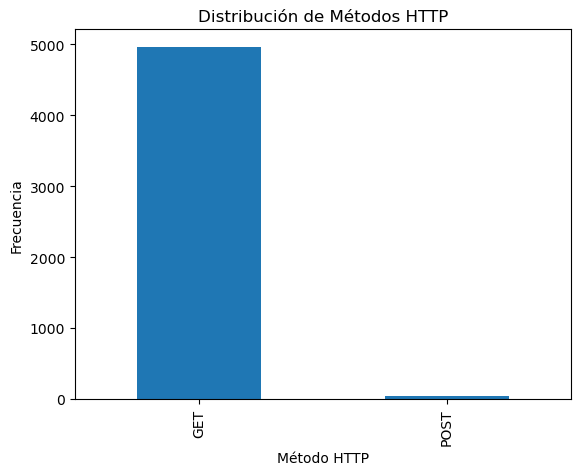

In [12]:
# Contar la frecuencia de cada método
method_counts = data['Request.Method'].value_counts()
print(method_counts)

# Visualizar la distribución de los métodos
import matplotlib.pyplot as plt

method_counts.plot(kind='bar')
plt.title('Distribución de Métodos HTTP')
plt.xlabel('Método HTTP')
plt.ylabel('Frecuencia')
plt.show()



In [13]:
# Revisar la distribución de códigos de estado HTTP para POST
post_data = data[data['Request.Method'] == 'POST']
status_counts_post = post_data['Http.Status Code'].value_counts()
print(status_counts_post)


Http.Status Code
200    38
403     1
Name: count, dtype: int64


In [14]:
# Revisar la distribución de códigos de estado HTTP para GET
post_data = data[data['Request.Method'] == 'GET']
status_counts_post = post_data['Http.Status Code'].value_counts()
print(status_counts_post)


Http.Status Code
200    4482
302     452
404      17
304       8
403       1
500       1
Name: count, dtype: int64


/var/folders/b4/41h6j7px379_f3m9cxf36879chh60t/T/ipykernel_5137/683555589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


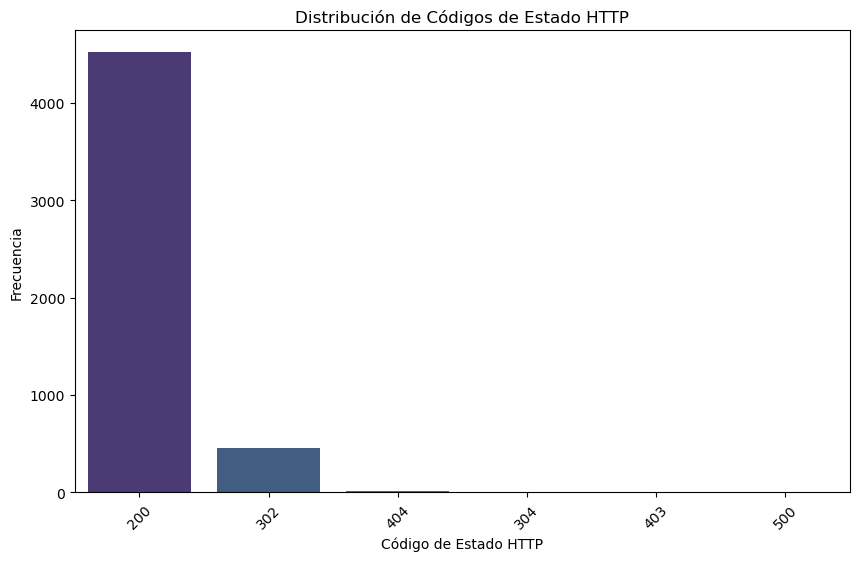

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la frecuencia de cada código de estado HTTP
status_counts = data['Http.Status Code'].value_counts()

# Visualizar la distribución de los códigos de estado HTTP
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Distribución de Códigos de Estado HTTP')
plt.xlabel('Código de Estado HTTP')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


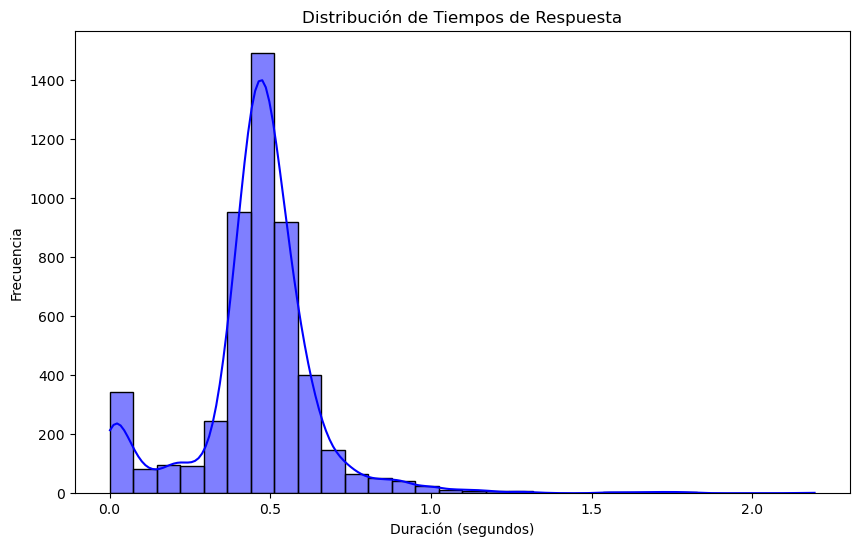

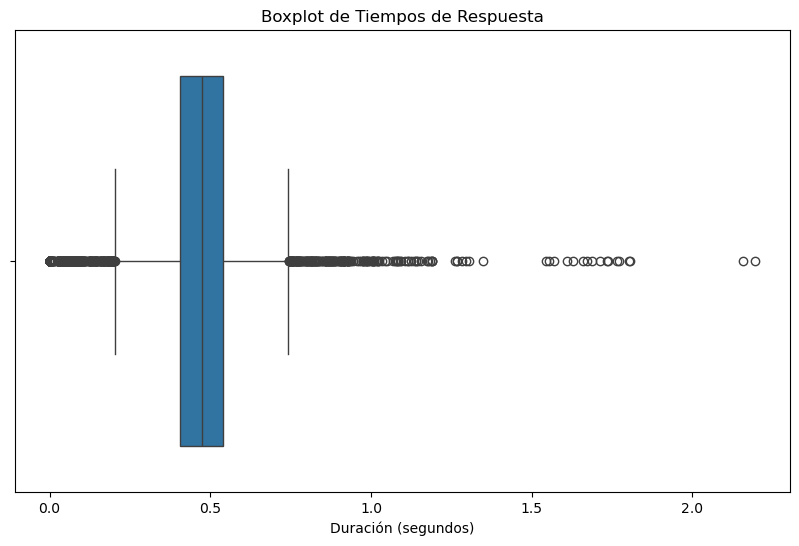

In [16]:
# Histograma de los tiempos de respuesta
plt.figure(figsize=(10, 6))
sns.histplot(data['Duration'], bins=30, kde=True, color='blue')
plt.title('Distribución de Tiempos de Respuesta')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para ver detalles de la distribución, como los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Duration'])
plt.title('Boxplot de Tiempos de Respuesta')
plt.xlabel('Duración (segundos)')
plt.show()


/var/folders/b4/41h6j7px379_f3m9cxf36879chh60t/T/ipykernel_5137/1183956864.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ip_counts.values[:20], y=ip_counts.index[:20], orient='h', palette='rocket')


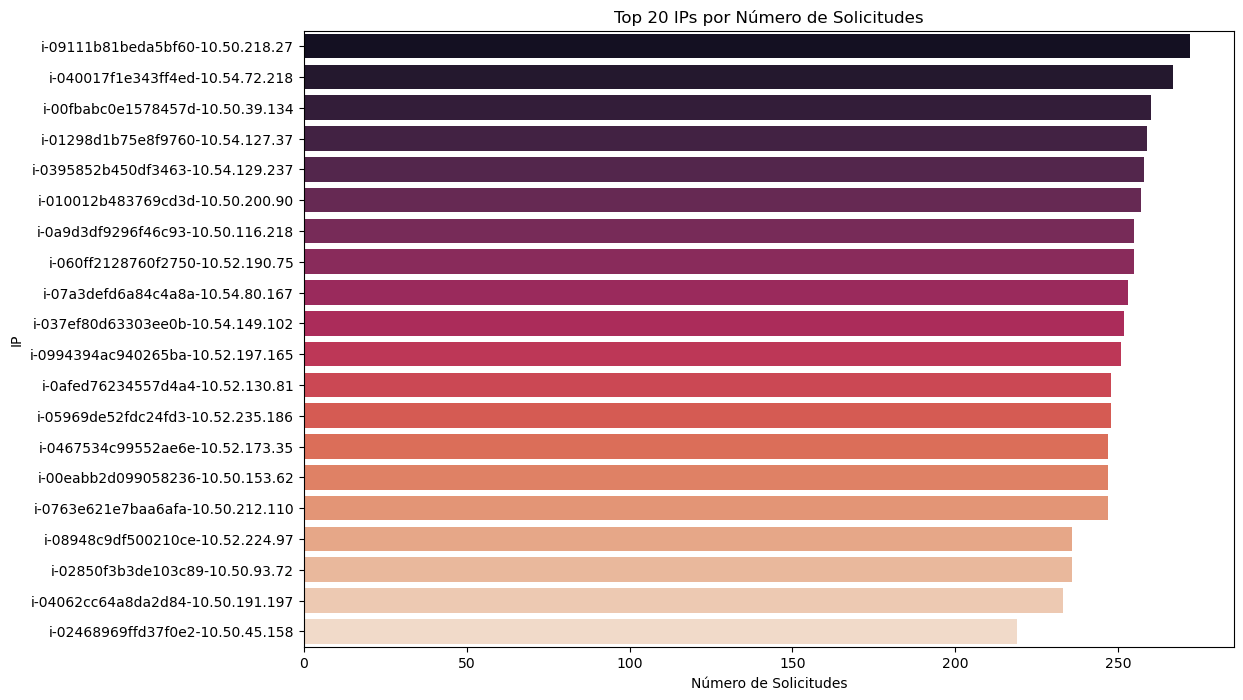

/var/folders/b4/41h6j7px379_f3m9cxf36879chh60t/T/ipykernel_5137/1183956864.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=uri_counts.values[:20], y=uri_counts.index[:20], orient='h', palette='rocket')


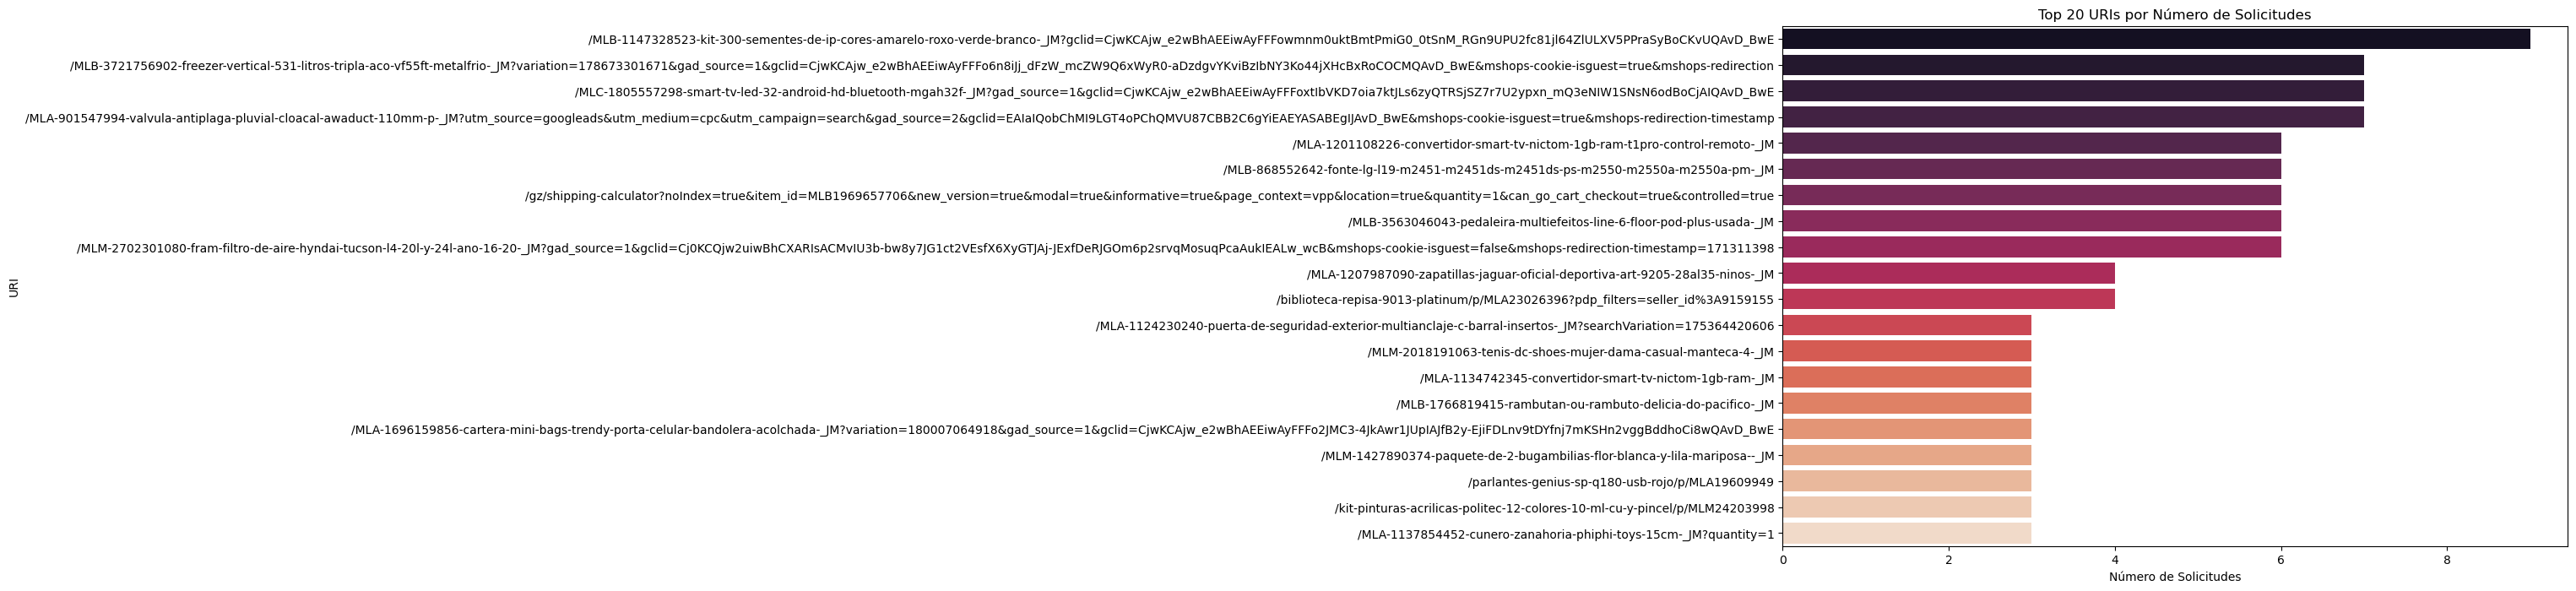

In [17]:
# Conteo de solicitudes por IP
ip_counts = data['Host'].value_counts()

# Visualizar las IPs con más solicitudes
plt.figure(figsize=(12, 8))
sns.barplot(x=ip_counts.values[:20], y=ip_counts.index[:20], orient='h', palette='rocket')
plt.title('Top 20 IPs por Número de Solicitudes')
plt.xlabel('Número de Solicitudes')
plt.ylabel('IP')
plt.show()

# Conteo de solicitudes por URI solicitada
uri_counts = data['Request.URI'].value_counts()

# Visualizar las URIs más solicitadas
plt.figure(figsize=(12, 8))
sns.barplot(x=uri_counts.values[:20], y=uri_counts.index[:20], orient='h', palette='rocket')
plt.title('Top 20 URIs por Número de Solicitudes')
plt.xlabel('Número de Solicitudes')
plt.ylabel('URI')
plt.show()


/var/folders/b4/41h6j7px379_f3m9cxf36879chh60t/T/ipykernel_5137/2616618343.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_counts.values[:10], y=host_counts.index[:10], palette='coolwarm')


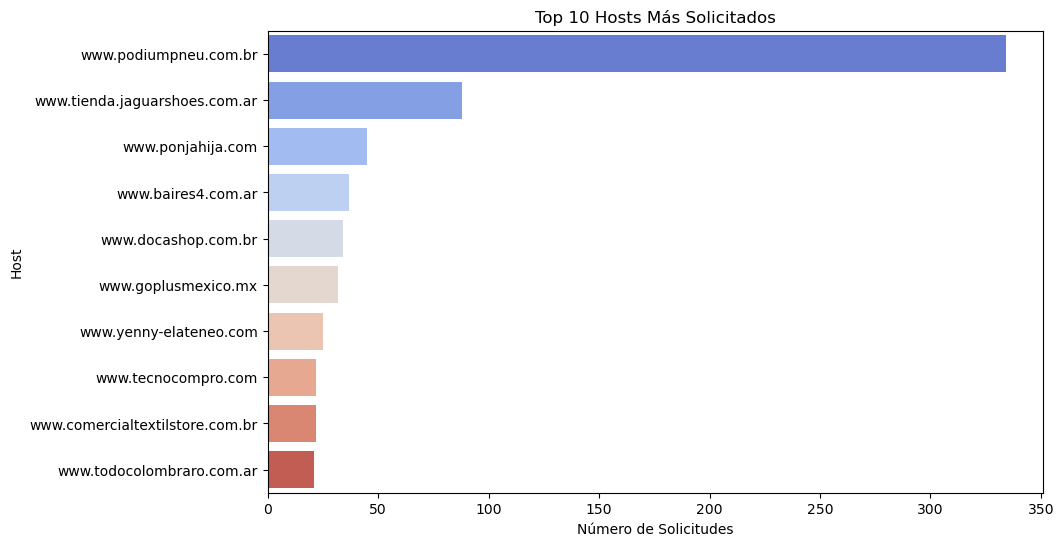

In [18]:
# Conteo de solicitudes por Host
host_counts = data['Request.Headers.Host'].value_counts()

# Visualización de los Hosts más solicitados
plt.figure(figsize=(10, 6))
sns.barplot(x=host_counts.values[:10], y=host_counts.index[:10], palette='coolwarm')
plt.title('Top 10 Hosts Más Solicitados')
plt.xlabel('Número de Solicitudes')
plt.ylabel('Host')
plt.show()


/var/folders/b4/41h6j7px379_f3m9cxf36879chh60t/T/ipykernel_5137/1394735451.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=referer_counts.values[:10], y=referer_counts.index[:10], orient='h', palette='muted')


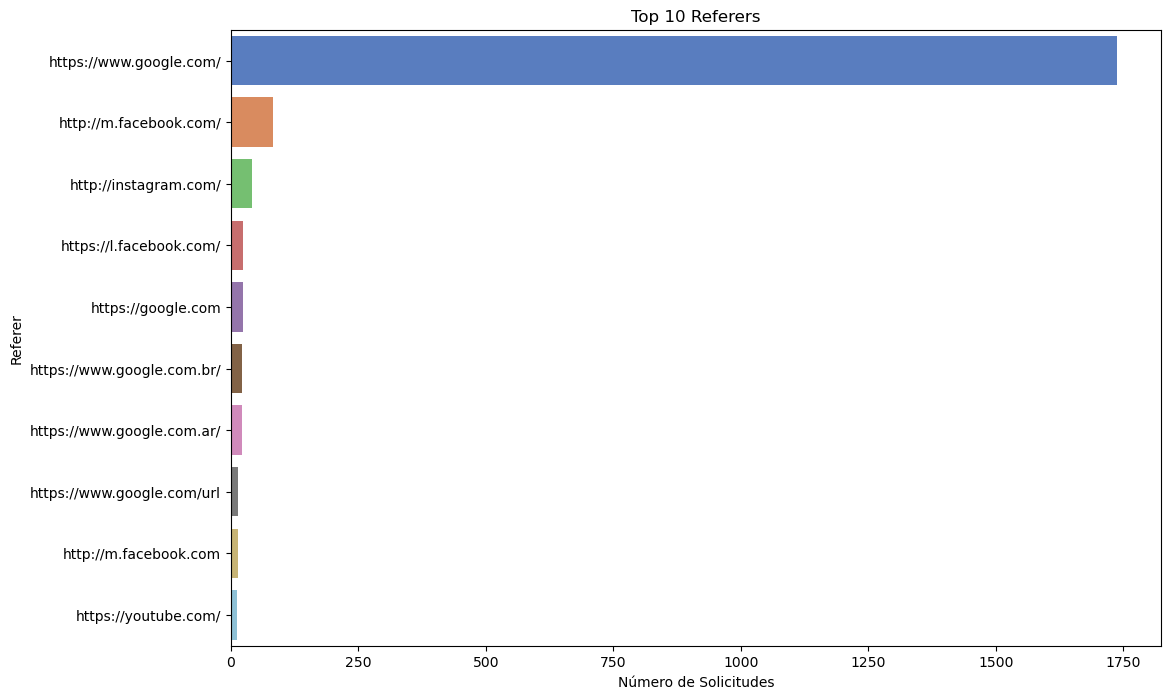

In [19]:
# Conteo de solicitudes por Referer
referer_counts = data['Request.Headers.Referer'].value_counts()

# Visualización de los Referers más comunes
plt.figure(figsize=(12, 8))
sns.barplot(x=referer_counts.values[:10], y=referer_counts.index[:10], orient='h', palette='muted')
plt.title('Top 10 Referers')
plt.xlabel('Número de Solicitudes')
plt.ylabel('Referer')
plt.show()


/var/folders/b4/41h6j7px379_f3m9cxf36879chh60t/T/ipykernel_5137/2825386287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=uri_counts.values[:10], y=uri_counts.index[:10], orient='h', palette='viridis')


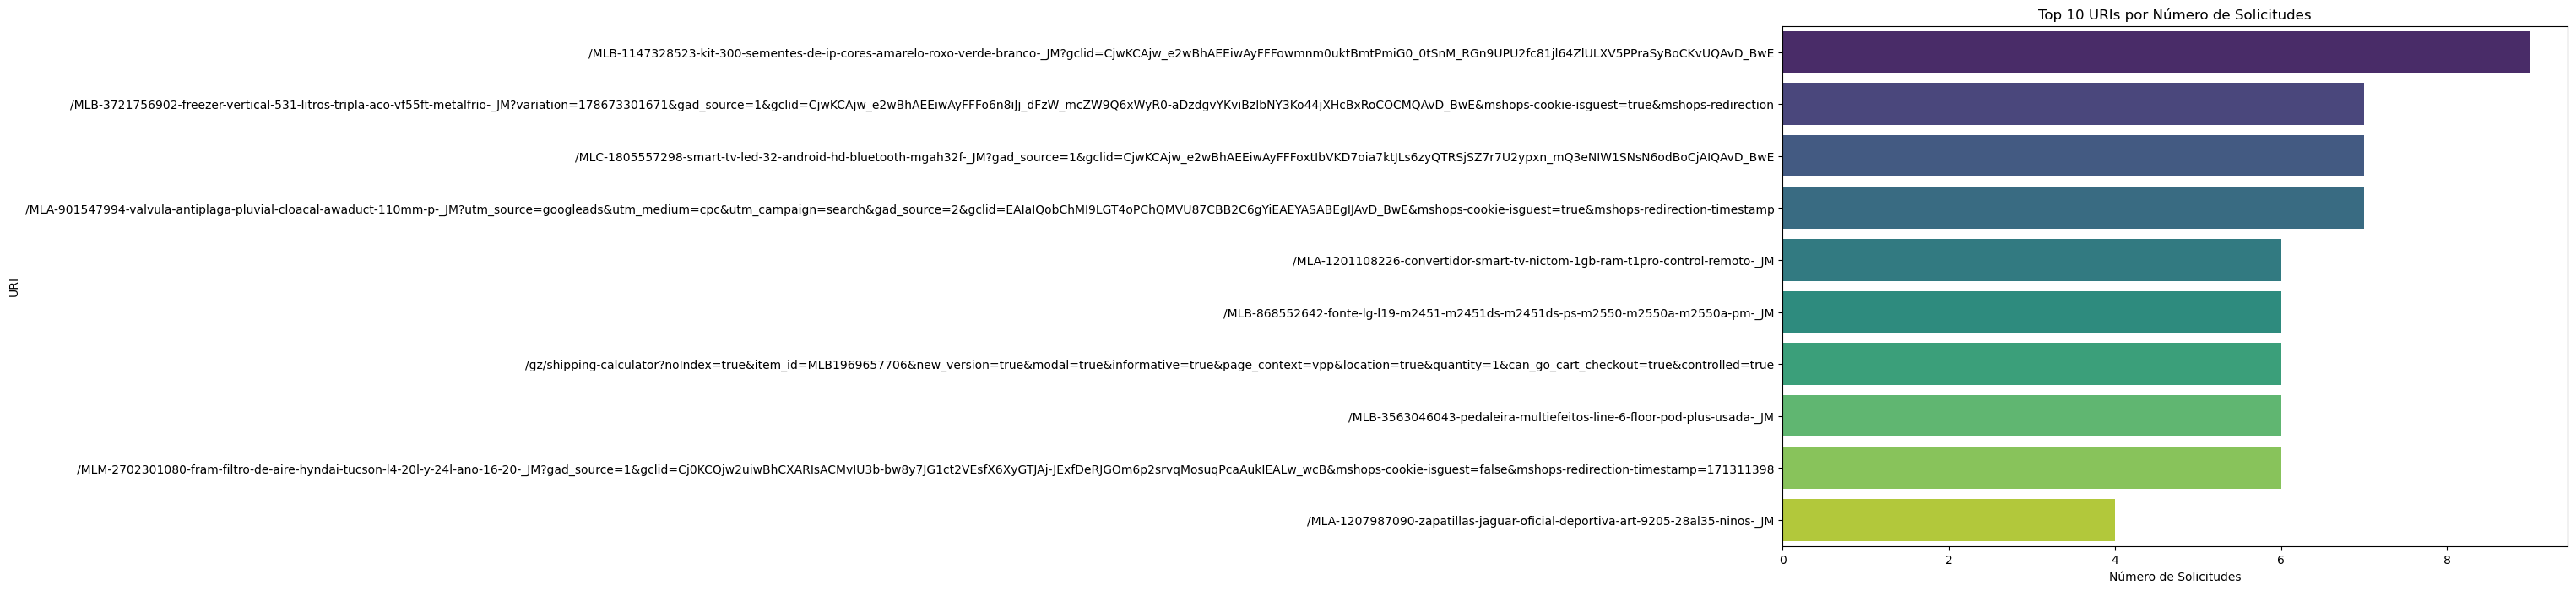

In [20]:
# Conteo de solicitudes por URI
uri_counts = data['Request.URI'].value_counts()

# Visualización de las URIs más solicitadas
plt.figure(figsize=(12, 8))
sns.barplot(x=uri_counts.values[:10], y=uri_counts.index[:10], orient='h', palette='viridis')
plt.title('Top 10 URIs por Número de Solicitudes')
plt.xlabel('Número de Solicitudes')
plt.ylabel('URI')
plt.show()


In [21]:
# Calcular el rango intercuartílico (IQR) para la duración
Q1 = data['Duration'].quantile(0.25)
Q3 = data['Duration'].quantile(0.75)
IQR = Q3 - Q1
# Definir límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_duration = data[(data['Duration'] < lower_bound) | (data['Duration'] > upper_bound)]
print("Anomalías detectadas en la duración:", outliers_duration[['Timestamp', 'Duration']])


Anomalías detectadas en la duración:                Timestamp  Duration
3    2024-04-14 16:59:59  0.156683
5    2024-04-14 16:59:59  0.789297
8    2024-04-14 16:59:59  0.746739
9    2024-04-14 16:59:59  0.767193
11   2024-04-14 16:59:59  0.095168
...                  ...       ...
4959 2024-04-14 16:58:47  0.048252
4963 2024-04-14 16:58:47  0.030851
4981 2024-04-14 16:58:46  0.184204
4988 2024-04-14 16:58:46  0.073472
4990 2024-04-14 16:58:46  0.036949

[708 rows x 2 columns]


/var/folders/b4/41h6j7px379_f3m9cxf36879chh60t/T/ipykernel_5137/3205366910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering.fillna(0, inplace=True)
/Users/carlosariver/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


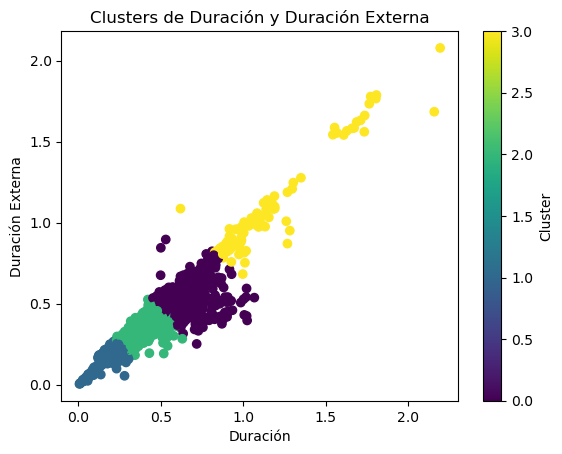

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elegir características para el clustering
features_for_clustering = data[['Duration', 'External Duration']]
# Llenar valores NaN
features_for_clustering.fillna(0, inplace=True)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(features_for_clustering)
data['Cluster'] = clusters

# Visualizar los clusters formados
plt.scatter(data['Duration'], data['External Duration'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters de Duración y Duración Externa')
plt.xlabel('Duración')
plt.ylabel('Duración Externa')
plt.colorbar(label='Cluster')
plt.show()


In [25]:
print(features.isnull().sum())

Duration                 0
External Call Count      0
External Duration      177
Total Time               0
dtype: int64


In [26]:
from sklearn.impute import SimpleImputer

# Crear un imputador para reemplazar los NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')

# Aplicar el imputador solo a la columna 'External Duration'
features['External Duration'] = imputer.fit_transform(features[['External Duration']])

# Verificar que no haya valores NaN
print(features.isnull().sum())

Duration               0
External Call Count    0
External Duration      0
Total Time             0
dtype: int64


/var/folders/b4/41h6j7px379_f3m9cxf36879chh60t/T/ipykernel_5137/2745028373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['External Duration'] = imputer.fit_transform(features[['External Duration']])


In [27]:
from sklearn.ensemble import IsolationForest

# Ajustar y predecir con IsolationForest
iso_forest = IsolationForest(contamination=0.01)
data['anomaly'] = iso_forest.fit_predict(features)

# Mostrar las primeras filas con la columna de anomalías
print(data[['Duration', 'External Call Count', 'External Duration', 'Total Time', 'anomaly']].head())


   Duration  External Call Count  External Duration  Total Time  anomaly
0  0.501393                  5.0           0.494632    0.576423        1
1  0.630478                  4.0           0.608032    0.704140        1
2  0.572940                  5.0           0.463782    0.598289        1
3  0.156683                  4.0           0.202773    0.216889        1
4  0.531048                  5.0           0.493034    0.593449        1


In [29]:
# Filtrar las filas que fueron marcadas como anómalas
anomalies = data[data['anomaly'] == -1]

# Mostrar las primeras filas de las anomalías detectadas
print(anomalies.head())


              Timestamp      App ID            App Name  \
16  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
360 2024-04-14 16:59:54  1340265931  shops.vpp-frontend   
371 2024-04-14 16:59:54  1340265931  shops.vpp-frontend   
374 2024-04-14 16:59:54  1340265931  shops.vpp-frontend   
405 2024-04-14 16:59:54  1340265931  shops.vpp-frontend   

                                          Container ID  Duration Entity.GUID  \
16   4b90b08da288573433c54094ec2a29a6769b2172eda45d...  1.044997         NaN   
360  6b4fdcd6a9c02abaeec5ca6ad2aeb97ed79ae3139e68e8...  1.349809         NaN   
371  d2022c25422b5c7c4cae2aa9f179b243058cc83db32903...  1.093100         NaN   
374  a7b9e790f9a18ad753bcb1d1e087c9baa84dabeb85ba20...  1.543405         NaN   
405  7f998ccf43a571cac3ca29ca33519ca815c12ef38d7542...  1.190794         NaN   

                                      Entity GUID  Error  External Call Count  \
16   OTg5NTg2fEFQTXxBUFBMSUNBVElPTnwxMzQwMjY1OTMx  False                  3.0   
36

In [23]:
# Contar solicitudes por IP
ip_counts = data['Host'].value_counts()
print("Top IPs por número de solicitudes:", ip_counts.head(10))

# Contar accesos por URI
uri_counts = data['Request.URI'].value_counts()
print("Top URIs por número de solicitudes:", uri_counts.head(10))


Top IPs por número de solicitudes: Host
i-09111b81beda5bf60-10.50.218.27     272
i-040017f1e343ff4ed-10.54.72.218     267
i-00fbabc0e1578457d-10.50.39.134     260
i-01298d1b75e8f9760-10.54.127.37     259
i-0395852b450df3463-10.54.129.237    258
i-010012b483769cd3d-10.50.200.90     257
i-0a9d3df9296f46c93-10.50.116.218    255
i-060ff2128760f2750-10.52.190.75     255
i-07a3defd6a84c4a8a-10.54.80.167     253
i-037ef80d63303ee0b-10.54.149.102    252
Name: count, dtype: int64
Top URIs por número de solicitudes: Request.URI
/MLB-1147328523-kit-300-sementes-de-ip-cores-amarelo-roxo-verde-branco-_JM?gclid=CjwKCAjw_e2wBhAEEiwAyFFFowmnm0uktBmtPmiG0_0tSnM_RGn9UPU2fc81jl64ZlULXV5PPraSyBoCKvUQAvD_BwE                                                                                       9
/MLB-3721756902-freezer-vertical-531-litros-tripla-aco-vf55ft-metalfrio-_JM?variation=178673301671&gad_source=1&gclid=CjwKCAjw_e2wBhAEEiwAyFFFo6n8iJj_dFzW_mcZW9Q6xWyR0-aDzdgvYKviBzIbNY3Ko44jXHcBxRoCOCMQAvD_BwE&mshop

In [49]:
from sklearn.ensemble import IsolationForest

# Configurar el modelo Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)  # contamination ajusta el umbral

# Ajustar el modelo
iso_forest.fit(data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']])

# Predecir anomalías (-1 para anomalías, 1 para normales)
data['anomaly'] = iso_forest.predict(data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']])

# Filtrar las anomalías detectadas
anomalies = data[data['anomaly'] == -1]
print("Anomalías detectadas:", len(anomalies))


Anomalías detectadas: 500


In [51]:
from sklearn.ensemble import IsolationForest

# Configurar el modelo Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)  # contamination ajusta el umbral

# Ajustar el modelo
iso_forest.fit(data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']])

# Predecir anomalías (-1 para anomalías, 1 para normales)
data['anomaly'] = iso_forest.predict(data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']])

# Filtrar las anomalías detectadas
anomalies = data[data['anomaly'] == -1]
print("Anomalías detectadas:", len(anomalies))

# Mostrar las primeras 10 filas de anomalías detectadas
print(anomalies.head(10))


Anomalías detectadas: 500
              Timestamp      App ID            App Name  \
5   2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
9   2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
15  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
16  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
20  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
25  2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
80  2024-04-14 16:59:58  1340265931  shops.vpp-frontend   
99  2024-04-14 16:59:58  1340265931  shops.vpp-frontend   
125 2024-04-14 16:59:58  1340265931  shops.vpp-frontend   
130 2024-04-14 16:59:58  1340265931  shops.vpp-frontend   

                                          Container ID  Duration  \
5    68e5a21903ff696b3d54f57b9af0f6c850c9a70f5dffd3...  0.789297   
9    15637cadc7624492fdc557e2b4ca408013264ce0a7fa36...  0.767193   
15   ab15762930b79f3a6e194479300c1b73fed40e164e7a9b...  0.234105   
16   4b90b08da288573433c54094ec2a29a6769b2172eda45d.

In [52]:
# Estadísticas descriptivas de las características clave para las filas normales
normal_data = data[data['anomaly'] == 1]
print(normal_data[['Duration', 'External Call Count', 'External Duration', 'Total Time']].describe())

# Comparación de algunas filas anómalas
print(anomalies[['Duration', 'External Call Count', 'External Duration', 'Total Time']].head(10))


          Duration  External Call Count  External Duration   Total Time
count  4500.000000          4500.000000        4437.000000  4500.000000
mean      0.462497             4.350588           0.410216     0.505222
std       0.136270             0.926628           0.112436     0.150032
min       0.001435             1.000000           0.007514     0.001688
25%       0.416392             4.000000           0.361591     0.445235
50%       0.473892             5.000000           0.417824     0.521229
75%       0.534966             5.000000           0.472649     0.591937
max       0.881347             6.000000           0.895790     1.008527
     Duration  External Call Count  External Duration  Total Time
5    0.789297             3.000000           0.678663    0.796049
9    0.767193             3.000000           0.717867    0.768541
15   0.234105             5.000000           0.231302    0.254094
16   1.044997             3.000000           1.003048    1.046864
20   0.904142         

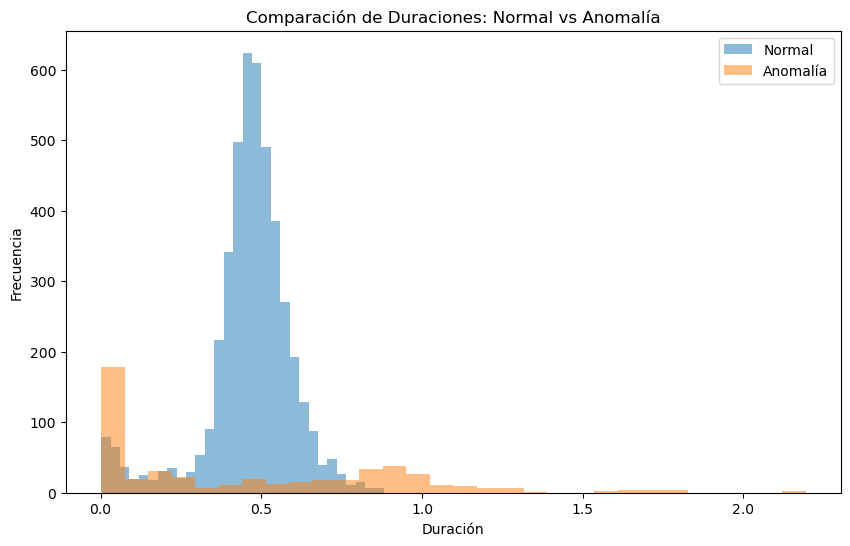

In [50]:
import matplotlib.pyplot as plt

# Visualizar las duraciones de solicitudes normales vs. anómalas
plt.figure(figsize=(10, 6))
plt.hist(data['Duration'][data['anomaly'] == 1], bins=30, alpha=0.5, label='Normal')
plt.hist(data['Duration'][data['anomaly'] == -1], bins=30, alpha=0.5, label='Anomalía')
plt.title('Comparación de Duraciones: Normal vs Anomalía')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Codificación de variables categóricas
data['Method_Encoded'] = data['Request.Method'].astype('category').cat.codes
data['URI_Encoded'] = data['Request.URI'].astype('category').cat.codes
data['Host_Encoded'] = data['Host'].astype('category').cat.codes

# Definir características y etiquetas
features = data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']]
labels = data['anomaly']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Entrenamiento del modelo de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicción y evaluación del modelo
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.94      0.94      0.94        18
           1       1.00      1.00      1.00      1482

    accuracy                           1.00      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       1.00      1.00      1.00      1500



In [28]:
# Mostrar las filas detectadas como anomalías
anomalies_detail = data[data['anomaly'] == -1]
print("Detalle de las anomalías detectadas:")
print(anomalies_detail)


Detalle de las anomalías detectadas:
               Timestamp      App ID            App Name  \
5    2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
9    2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
15   2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
16   2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
20   2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
...                  ...         ...                 ...   
4918 2024-04-14 16:58:47  1340265931  shops.vpp-frontend   
4925 2024-04-14 16:58:47  1340265931  shops.vpp-frontend   
4941 2024-04-14 16:58:47  1340265931  shops.vpp-frontend   
4953 2024-04-14 16:58:47  1340265931  shops.vpp-frontend   
4957 2024-04-14 16:58:47  1340265931  shops.vpp-frontend   

                                           Container ID  Duration Entity.GUID  \
5     68e5a21903ff696b3d54f57b9af0f6c850c9a70f5dffd3...  0.789297         NaN   
9     15637cadc7624492fdc557e2b4ca408013264ce0a7fa36...  0.767193         NaN   

In [29]:
# Mostrar detalles específicos de las anomalías
print(anomalies_detail[['Timestamp', 'Duration', 'Request.URI', 'Request.Headers.Host']])


               Timestamp  Duration  \
5    2024-04-14 16:59:59  0.789297   
9    2024-04-14 16:59:59  0.767193   
15   2024-04-14 16:59:59  0.234105   
16   2024-04-14 16:59:59  1.044997   
20   2024-04-14 16:59:59  0.904142   
...                  ...       ...   
4918 2024-04-14 16:58:47  0.979642   
4925 2024-04-14 16:58:47  0.062213   
4941 2024-04-14 16:58:47  0.876160   
4953 2024-04-14 16:58:47  1.079870   
4957 2024-04-14 16:58:47  0.071401   

                                            Request.URI  \
5     /MLA-1403668708-zapatillas-jaguar-oficial-trek...   
9     /motherboard-msi-b450m-a-pro-max-ii-am4-2-colo...   
15                         /p/MLB2820460107/add-to-cart   
16    /p/api/items?attributes=COLOR_SECONDARY_COLOR%...   
20    /MLA-907129286-colchon-cama-perro-gato-chico-f...   
...                                                 ...   
4918  /MLB-3275833870-paralama-do-estribo-direito-1-...   
4925  /MLA-857285352-tejuela-refractaria-de-3cm-parr...   
4941  /MLA-1

            Timestamp      App ID            App Name  \
0 2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
1 2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
2 2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
3 2024-04-14 16:59:59  1340265931  shops.vpp-frontend   
4 2024-04-14 16:59:59  1340265931  shops.vpp-frontend   

                                        Container ID  Duration Entity.GUID  \
0  15637cadc7624492fdc557e2b4ca408013264ce0a7fa36...  0.501393         NaN   
1  d39815332d9858eee4d0f28f05b6a6166ed3284ffa01fa...  0.630478         NaN   
2  6b4fdcd6a9c02abaeec5ca6ad2aeb97ed79ae3139e68e8...  0.572940         NaN   
3  6b4fdcd6a9c02abaeec5ca6ad2aeb97ed79ae3139e68e8...  0.156683         NaN   
4  d39815332d9858eee4d0f28f05b6a6166ed3284ffa01fa...  0.531048         NaN   

                                    Entity GUID  Error  External Call Count  \
0  OTg5NTg2fEFQTXxBUFBMSUNBVElPTnwxMzQwMjY1OTMx  False                  5.0   
1  OTg5NTg2fEFQTXxBUFBMSUNBVEl

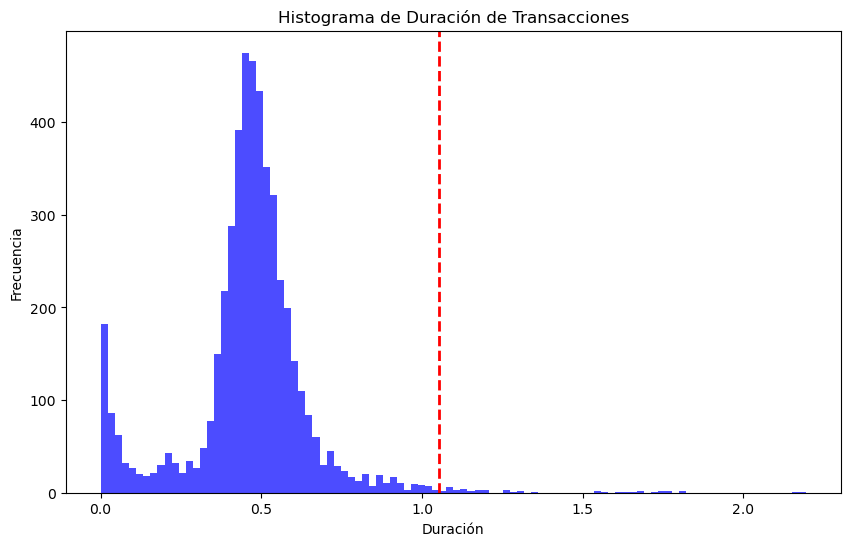

Se han detectado transacciones anómalas.
               Timestamp      App ID            App Name  \
360  2024-04-14 16:59:54  1340265931  shops.vpp-frontend   
371  2024-04-14 16:59:54  1340265931  shops.vpp-frontend   
374  2024-04-14 16:59:54  1340265931  shops.vpp-frontend   
405  2024-04-14 16:59:54  1340265931  shops.vpp-frontend   
892  2024-04-14 16:59:46  1340265931  shops.vpp-frontend   
898  2024-04-14 16:59:46  1340265931  shops.vpp-frontend   
902  2024-04-14 16:59:46  1340265931  shops.vpp-frontend   
1650 2024-04-14 16:59:35  1340265931  shops.vpp-frontend   
1662 2024-04-14 16:59:35  1340265931  shops.vpp-frontend   
1665 2024-04-14 16:59:35  1340265931  shops.vpp-frontend   
1669 2024-04-14 16:59:35  1340265931  shops.vpp-frontend   
2352 2024-04-14 16:59:25  1340265931  shops.vpp-frontend   
2354 2024-04-14 16:59:25  1340265931  shops.vpp-frontend   
2359 2024-04-14 16:59:25  1340265931  shops.vpp-frontend   
2365 2024-04-14 16:59:25  1340265931  shops.vpp-frontend   

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de datos
df = pd.read_csv('table.csv', parse_dates=['Timestamp'])

# Análisis exploratorio de datos básico
print(df.head())
print(df.describe())

# Identificación de la línea base para la duración de las transacciones
mean_duration = df['Duration'].mean()
std_duration = df['Duration'].std()
threshold_duration = mean_duration + 3 * std_duration

# Detección de transacciones anómalas por la duración
anomalies_duration = df[df['Duration'] > threshold_duration]

# Investigación de IPs sospechosas
ip_counts = df['Host'].value_counts()
threshold_ip = np.percentile(ip_counts, 99) # IPs que superan el percentil 99
suspicious_ips = ip_counts[ip_counts > threshold_ip]

# Visualización de duraciones de transacción
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'], bins=100, color='blue', alpha=0.7)
plt.axvline(threshold_duration, color='red', linestyle='dashed', linewidth=2)
plt.title('Histograma de Duración de Transacciones')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.show()

# Ejemplo de alerta simple basada en anomalías detectadas
if not anomalies_duration.empty:
    print('Se han detectado transacciones anómalas.')
    print(anomalies_duration)


In [44]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email_alert(subject, body):
    sender_email = "misarchivos2040@gmail.com"
    receiver_email = "misarchivos2040@gmail.com"
    password = "xhkx koev lmjw xgrp"

    # Crear el mensaje de correo electrónico
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject

    # Adjuntar el cuerpo del mensaje
    message.attach(MIMEText(body, "plain"))

    # Conectar al servidor SMTP de Gmail
    try:
        with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
            server.login(sender_email, password)
            server.sendmail(sender_email, receiver_email, message.as_string())
        print("Correo enviado exitosamente.")
    except Exception as e:
        print(f"Error al enviar el correo: {e}")

# Ejemplo de uso de la función de alerta
send_email_alert("Alerta de Anomalía Detectada", "Se ha detectado una anomalía en el tráfico de la web.")


Correo enviado exitosamente.


In [54]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def send_email_alert(subject, body):
    sender_email = "misarchivos2040@gmail.com"
    receiver_email = "misarchivos2040@gmail.com"
    password = "xhkx koev lmjw xgrp"

    # Crear el mensaje de correo electrónico
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject

    # Adjuntar el cuerpo del mensaje
    message.attach(MIMEText(body, "plain"))

    # Conectar al servidor SMTP de Gmail
    try:
        with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
            server.login(sender_email, password)
            server.sendmail(sender_email, receiver_email, message.as_string())
        print("Correo enviado exitosamente.")
    except Exception as e:
        print(f"Error al enviar el correo: {e}")

# Cargar los datos
file_path = 'table.csv'
data = pd.read_csv(file_path)

# Preprocesar los datos (Ejemplo de codificación de variables categóricas)
encoder = LabelEncoder()
data['Method_Encoded'] = encoder.fit_transform(data['Request.Method'])
data['URI_Encoded'] = encoder.fit_transform(data['Request.URI'])
data['Host_Encoded'] = encoder.fit_transform(data['Request.Headers.Host'])

# Configurar el modelo Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Ajustar el modelo
iso_forest.fit(data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']])

# Predecir anomalías (-1 para anomalías, 1 para normales)
data['anomaly'] = iso_forest.predict(data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']])

# Filtrar las anomalías detectadas
anomalies = data[data['anomaly'] == -1]
anomalies_count = len(anomalies)
print("Anomalías detectadas:", anomalies_count)

# Enviar correo si se detectan anomalías
if anomalies_count > 0:
    subject = "Alerta de Anomalía Detectada"
    body = f"Se han detectado {anomalies_count} anomalías en el tráfico de la web."
    send_email_alert(subject, body)
else:
    print("No se han detectado anomalías.")


Anomalías detectadas: 500
Correo enviado exitosamente.


In [55]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def send_email_alert(subject, body):
    sender_email = "misarchivos2040@gmail.com"
    receiver_email = "misarchivos2040@gmail.com"
    password = "xhkx koev lmjw xgrp"

    # Crear el mensaje de correo electrónico
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject

    # Adjuntar el cuerpo del mensaje
    message.attach(MIMEText(body, "plain"))

    # Conectar al servidor SMTP de Gmail
    try:
        with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
            server.login(sender_email, password)
            server.sendmail(sender_email, receiver_email, message.as_string())
        print("Correo enviado exitosamente.")
    except Exception as e:
        print(f"Error al enviar el correo: {e}")

# Cargar los datos
file_path = 'table.csv'
data = pd.read_csv(file_path)

# Preprocesar los datos (Ejemplo de codificación de variables categóricas)
encoder = LabelEncoder()
data['Method_Encoded'] = encoder.fit_transform(data['Request.Method'])
data['URI_Encoded'] = encoder.fit_transform(data['Request.URI'])
data['Host_Encoded'] = encoder.fit_transform(data['Request.Headers.Host'])

# Configurar el modelo Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Ajustar el modelo
iso_forest.fit(data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']])

# Predecir anomalías (-1 para anomalías, 1 para normales)
data['anomaly'] = iso_forest.predict(data[['Method_Encoded', 'URI_Encoded', 'Host_Encoded', 'Duration']])

# Filtrar las anomalías detectadas
anomalies = data[data['anomaly'] == -1]
anomalies_count = len(anomalies)
print("Anomalías detectadas:", anomalies_count)

# Enviar correo si se detectan anomalías
if anomalies_count > 0:
    subject = "Alerta de Anomalía Detectada"
    body = f"Se han detectado {anomalies_count} anomalías en el tráfico de la web.\n\nDetalles de las anomalías:\n"
    for index, row in anomalies.iterrows():
        body += f"Timestamp: {row['Timestamp']}, Method: {row['Request.Method']}, URI: {row['Request.URI']}, Host: {row['Request.Headers.Host']}, Duration: {row['Duration']}\n"
    send_email_alert(subject, body)
else:
    print("No se han detectado anomalías.")


Anomalías detectadas: 500
Correo enviado exitosamente.
